In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import skew,kurtosis, probplot
from statsmodels.formula.api import ols  
import statsmodels.api as sm  
import probscale

In [2]:
path = "palm_ffb.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
data.shape

(130, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [12]:
data = data.drop(["Date"], axis = 1)

In [14]:
data.nunique()

SoilMoisture     127
Average_Temp     128
Min_Temp          31
Max_Temp          46
Precipitation    126
Working_days       7
HA_Harvested     130
FFB_Yield         76
dtype: int64

In [15]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [16]:
skew(data, axis = 0)

array([-0.3897717 , -0.33666356, -1.10837727, -0.21313881,  0.52013553,
       -0.65316511, -0.06369858,  0.18644545])

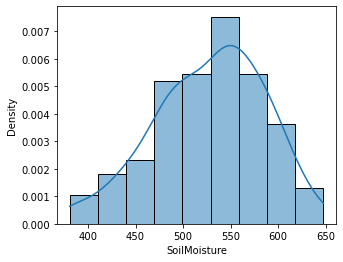

In [18]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['SoilMoisture'], kde=True, stat="density")
plt.show()

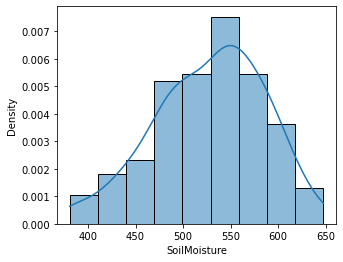

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['Average_Temp'], kde=True, stat="density")
plt.show()

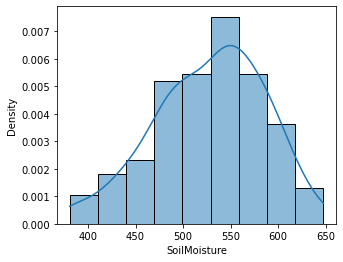

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['Min_Temp'], kde=True, stat="density")
plt.show()

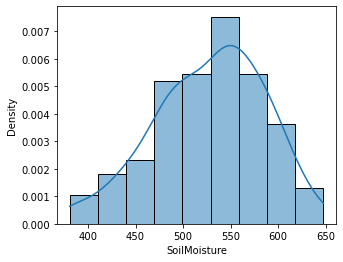

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['Max_Temp'], kde=True, stat="density")
plt.show()

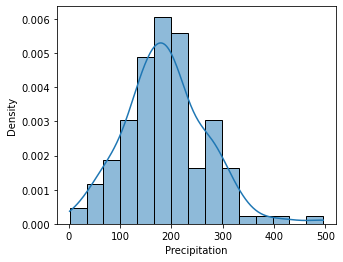

In [22]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['Precipitation'], kde=True, stat="density")
plt.show()

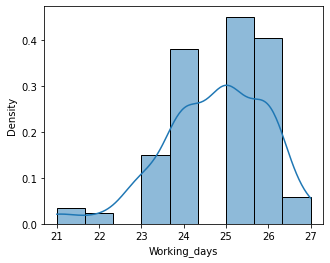

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['Working_days'], kde=True, stat="density")
plt.show()

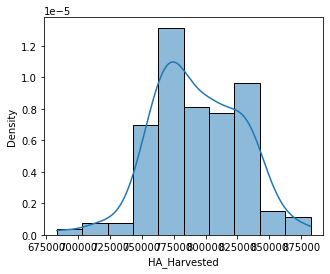

In [26]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sb.histplot(data['HA_Harvested'], kde=True, stat="density")
plt.show()

- "Working_days, HA_Harvested" are not normal distributed
- "SoilMoisture, Average_Temp, Min_Temp, Max_Temp, Percipitation" are normal distributed but skewed, can use parametric test to examine the relation with "FFB_yield"
- Non parametric data (non-normal) is eliminated since these do not fulfill the assumption of regression.

In [29]:
data = data.drop(["Working_days", "HA_Harvested"], axis = 1)

- H0 : The effect of column "FFB_Yield" is independent to the other variable
- H1 : There is no interaction effect between "FFB_Yield" and others.

In [33]:
model = ols(
    'FFB_Yield ~ SoilMoisture + Average_Temp + Min_Temp + Max_Temp + Precipitation', data = data).fit()
sm.stats.anova_lm(model, typ=2) 
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(model, typ = 2)   
print('----------------------------------------------------------------------------------------') 
print('ANOVA Table')  
print(aovtable)  
print()  

----------------------------------------------------------------------------------------
ANOVA Table
                 sum_sq     df          F    PR(>F)
SoilMoisture   0.266803    1.0   3.687321  0.057124
Average_Temp   0.000467    1.0   0.006460  0.936072
Min_Temp       0.016253    1.0   0.224623  0.636373
Max_Temp       0.000037    1.0   0.000511  0.982008
Precipitation  1.102094    1.0  15.231373  0.000155
Residual       8.972251  124.0        NaN       NaN



- The null hypothesis testing is rejected when p-value is less than or equal to 0.05
- Hence, only "Precipitation" is dependent to "FFB_Yield"

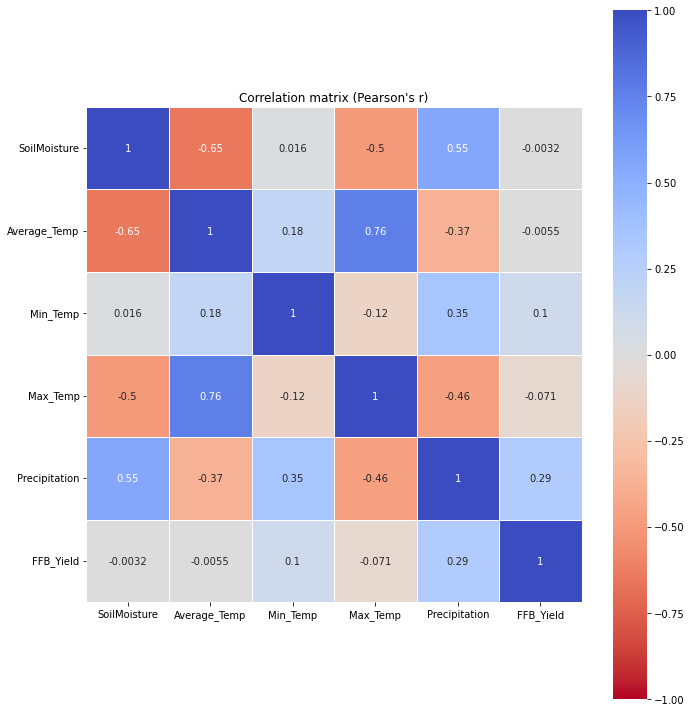

In [34]:
plt.figure(figsize = (10, 10))
ax = sb.heatmap(
    data.corr(),
    vmin=-1,
    vmax=1,
    square=True,
    linewidth=0.5,
    cmap="coolwarm_r",
    annot=True,
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set(title="Correlation matrix (Pearson's r)")

plt.tight_layout()
plt.show()

- Correlation table illustrates there is only Precipitation is dependent to FFB_yield